Making an AD Leo SED for comparison with others.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from scipy.interpolate import interp1d


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

We have a 1000A+ spectrum from http://vpl.astro.washington.edu/spectra/stellar/mstar.htm, plus EUVE data

In [3]:
w1, f1, e1 = np.loadtxt('adleo_dat.txt', unpack=True, usecols=(0,1,2), skiprows=175)
w1, f1, e1 = w1*10000, f1*1000, e1*1000

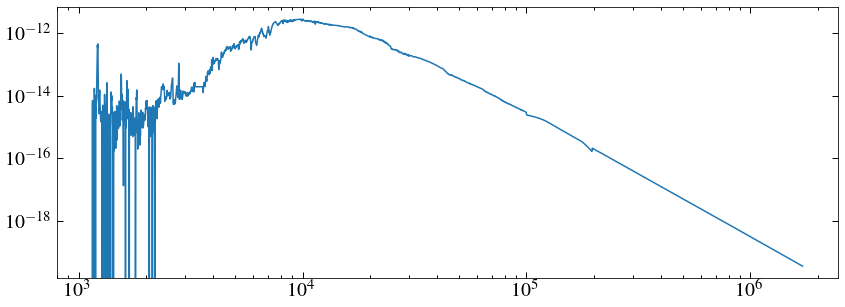

In [4]:
plt.plot(w1,f1)
plt.xscale('log')
plt.yscale('log')

In [5]:
path = '/media/david/5tb_storage1/ad_leo/EUVE/'
datasets = glob.glob('{}ad_leo*'.format(path))
datasets

['/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__0003091327N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544D',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9605030109N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904021609N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904050046N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904092045N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904170332N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904251629N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9905061641N']

Data is in the first extension of the "vo.fits" file

/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__0003091327N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544D
1200
70.05000305175781 189.95000483840704 75.75000313669443
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9605030109N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904021609N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904050046N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904092045N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904170332N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904251629N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9905061641N
2750
70.05 699.8 75.75


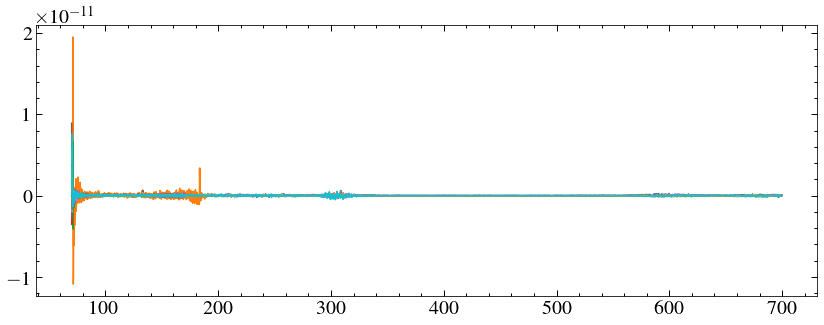

In [6]:
for ds in datasets:
    print (ds)
    spec = glob.glob('{}/*vo.fits'.format(ds))[0]
    data = fits.getdata(spec, 1)[0]
    print(len(data['Wave']))
    print(data['WAVE'][0], data['WAVE'][-1], data['WAVE'][57])
    plt.plot(data['WAVE'], data['FLUX'])
   # plt.show()
   

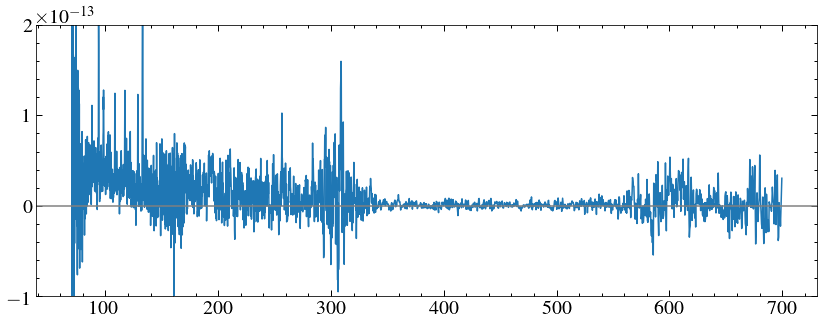

In [7]:
short = '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544D' #missing sw, just junk it for now
fa = []
for ds in datasets:
    if ds != short: 
        spec = glob.glob('{}/*vo.fits'.format(ds))[0]
        data = fits.getdata(spec, 1)[0]
        w2 = data['WAVE']
        fa.append(data['FLUX'])
f2 = np.mean(fa, axis=0)
e2 = np.std(fa, axis=0)

plt.plot(w2, f2)
plt.ylim(-0.1e-12, 0.2e-12)
plt.axhline(0, c='0.5')
#plt.plot(w2, e2)
#plt.yscale('log')  

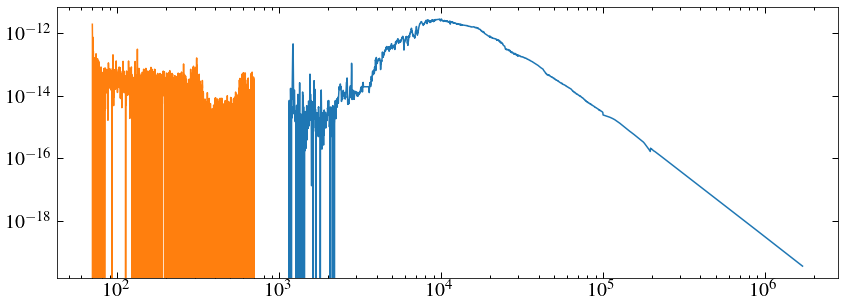

In [8]:
plt.plot(w1, f1)
plt.plot(w2, f2)
plt.xscale('log')
plt.yscale('log')

In [10]:
#data = hdul[1].data
#plt.plot(np.arange(len(data[0][0])), data[0][0])
#data[0][0]
#data.names


In [11]:
#plt.plot(data[0]['WAVE'], data[0]['FLUX'])

Add in a linksy model for the missing EUV. There's also a STIS E140M spectrum on MAST.

In [12]:
lya = 9.97e-12# ergs cm-2 s-1